In [2]:
#import libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

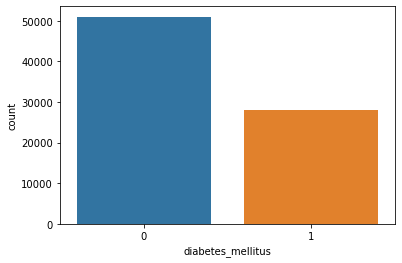

In [3]:
#designate the path where you saved your data
data_path = "/Users/basavaraja/Desktop/Code/data.csv"

#Load the data using pandas read_csv function. 
diabetes = pd.read_csv(data_path)

#Show distribution of the class on whole dataset
sns.countplot(x= 'diabetes_mellitus', data= diabetes)



In [134]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             79129 non-null  object 
 1   ethnicity          78198 non-null  object 
 2   age                76317 non-null  float64
 3   height             77978 non-null  float64
 4   weight             77086 non-null  float64
 5   bmi                76468 non-null  float64
 6   h1_temp_max        61223 non-null  float64
 7   h1_temp_min        61223 non-null  float64
 8   d1_albumin_max     36066 non-null  float64
 9   d1_albumin_min     36066 non-null  float64
 10  d1_bilirubin_max   32682 non-null  float64
 11  d1_bun_max         71249 non-null  float64
 12  d1_glucose_min     74800 non-null  float64
 13  d1_hco3_max        67258 non-null  float64
 14  d1_hco3_min        67258 non-null  float64
 15  d1_platelets_max   67993 non-null  float64
 16  d1_potassium_max   719

In [135]:
diabetes.var()

/var/folders/52/rhdlwzj16kb1r8v1j8fvj4sc0000gn/T/ipykernel_1006/1590890502.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diabetes.var()


age                    270.494421
height                 117.397587
weight                 648.491956
bmi                     72.045920
h1_temp_max              0.595499
h1_temp_min              0.633245
d1_albumin_max           0.446183
d1_albumin_min           0.452648
d1_bilirubin_max         5.001529
d1_bun_max             443.637418
d1_glucose_min        1647.795454
d1_hco3_max             19.391144
d1_hco3_min             26.267751
d1_platelets_max      7994.848918
d1_potassium_max         0.459391
d1_potassium_min         0.343519
d1_sodium_max           23.203512
d1_sodium_min           24.218501
d1_wbc_max              45.926929
d1_wbc_min              35.024636
h1_glucose_max       10444.503635
intubated_apache         0.131511
d1_heartrate_max       481.427883
heart_rate_apache      937.713062
gcs_motor_apache         1.580350
gcs_eyes_apache          0.866107
h1_spo2_max              9.670224
map_apache            1768.938323
diabetes_mellitus        0.229163
dtype: float64

In [136]:
data_missing = diabetes.isna()
data_missing.head()

,gender,ethnicity,age,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bun_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,h1_spo2_max,map_apache,diabetes_mellitus
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
missing_values = data_missing.sum()
missing_values

gender                  30
ethnicity              961
age                   2842
height                1181
weight                2073
bmi                   2691
h1_temp_max          17936
h1_temp_min          17936
d1_albumin_max       43093
d1_albumin_min       43093
d1_bilirubin_max     46477
d1_bun_max            7910
d1_glucose_min        4359
d1_hco3_max          11901
d1_hco3_min          11901
d1_platelets_max     11166
d1_potassium_max      7187
d1_potassium_min      7187
d1_sodium_max         7615
d1_sodium_min         7615
d1_wbc_max           10479
d1_wbc_min           10479
h1_glucose_max       43772
intubated_apache         0
d1_heartrate_max       145
heart_rate_apache      156
gcs_motor_apache      1224
gcs_eyes_apache       1224
h1_spo2_max           3804
map_apache             228
diabetes_mellitus        0
dtype: int64

In [138]:
# find features with more than 60% missing values
missing_values/len(diabetes)

gender               0.000379
ethnicity            0.012140
age                  0.035902
height               0.014919
weight               0.026188
bmi                  0.033995
h1_temp_max          0.226582
h1_temp_min          0.226582
d1_albumin_max       0.544385
d1_albumin_min       0.544385
d1_bilirubin_max     0.587135
d1_bun_max           0.099925
d1_glucose_min       0.055066
d1_hco3_max          0.150343
d1_hco3_min          0.150343
d1_platelets_max     0.141058
d1_potassium_max     0.090792
d1_potassium_min     0.090792
d1_sodium_max        0.096199
d1_sodium_min        0.096199
d1_wbc_max           0.132379
d1_wbc_min           0.132379
h1_glucose_max       0.552963
intubated_apache     0.000000
d1_heartrate_max     0.001832
heart_rate_apache    0.001971
gcs_motor_apache     0.015463
gcs_eyes_apache      0.015463
h1_spo2_max          0.048055
map_apache           0.002880
diabetes_mellitus    0.000000
dtype: float64

In [139]:
le = LabelEncoder()
diabetes.gender = le.fit_transform(diabetes.gender)
diabetes.ethnicity = le.fit_transform(diabetes.ethnicity)
diabetes.head()


,gender,ethnicity,age,height,weight,bmi,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bun_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,intubated_apache,d1_heartrate_max,heart_rate_apache,gcs_motor_apache,gcs_eyes_apache,h1_spo2_max,map_apache,diabetes_mellitus
0,1,2,68.0,180.3,73.9,22.732803,39.5,37.5,2.3,2.3,0.4,31.0,109.0,19.0,15.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,0,119.0,118.0,6.0,3.0,100.0,40.0,1
1,0,2,25.0,172.7,95.3,31.952749,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,96.0,102.0,6.0,3.0,98.0,68.0,0
2,0,2,81.0,165.1,61.7,22.635548,35.6,34.8,NaN,NaN,NaN,NaN,88.0,NaN,NaN,198.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,1,116.0,114.0,6.0,4.0,100.0,60.0,0
3,1,2,19.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,89.0,60.0,NaN,NaN,100.0,103.0,0
4,0,2,77.0,160.0,70.2,27.421875,36.3,36.3,1.6,1.6,0.5,11.0,128.0,27.0,26.0,557.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,0,118.0,120.0,3.0,1.0,95.0,46.0,1


In [4]:
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

print(X)
diabetes.info()

[['M' 'Caucasian' 68.0 ... 3.0 100.0 40.0]
 ['F' 'Caucasian' 25.0 ... 3.0 98.0 68.0]
 ['F' 'Caucasian' 81.0 ... 4.0 100.0 60.0]
 ...
 ['M' 'African American' 61.0 ... 4.0 100.0 173.0]
 ['M' 'Caucasian' 80.0 ... 4.0 nan 54.0]
 ['M' 'Caucasian' 88.0 ... 1.0 100.0 42.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             79129 non-null  object 
 1   ethnicity          78198 non-null  object 
 2   age                76317 non-null  float64
 3   height             77978 non-null  float64
 4   weight             77086 non-null  float64
 5   bmi                76468 non-null  float64
 6   h1_temp_max        61223 non-null  float64
 7   h1_temp_min        61223 non-null  float64
 8   d1_albumin_max     36066 non-null  float64
 9   d1_albumin_min     36066 non-null  float64
 10  d1_bilirubin_max   32682 non-null  float6

In [141]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])
print(X)

[[  1.           2.          68.         ...   3.         100.
   40.        ]
 [  0.           2.          25.         ...   3.          98.
   68.        ]
 [  0.           2.          81.         ...   4.         100.
   60.        ]
 ...
 [  1.           0.          61.         ...   4.         100.
  173.        ]
 [  1.           2.          80.         ...   4.          98.11025148
   54.        ]
 [  1.           2.          88.         ...   1.         100.
   42.        ]]


In [142]:
df = pd.DataFrame(X)
print(df.head())

    0    1     2      3          4          5          6          7   \
0  1.0  2.0  68.0  180.3  73.900000  22.732803  39.500000  37.500000   
1  0.0  2.0  25.0  172.7  95.300000  31.952749  36.700000  36.700000   
2  0.0  2.0  81.0  165.1  61.700000  22.635548  35.600000  34.800000   
3  1.0  2.0  19.0  188.0  85.114552  29.600786  36.721315  36.612966   
4  0.0  2.0  77.0  160.0  70.200000  27.421875  36.300000  36.300000   

         8        9         10        11          12         13         14  \
0  2.300000  2.30000  0.400000  31.00000  109.000000  19.000000  15.000000   
1  2.947069  2.87604  1.162205  26.64004  116.255602  24.441869  23.105831   
2  2.947069  2.87604  1.162205  26.64004   88.000000  24.441869  23.105831   
3  2.947069  2.87604  1.162205  26.64004  116.255602  24.441869  23.105831   
4  1.600000  1.60000  0.500000  11.00000  128.000000  27.000000  26.000000   

           15        16        17          18          19         20  \
0  233.000000  4.000000  3

In [143]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

# algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 3, eps = 10)
clusters = outlier_detection.fit_predict(X[:, 3:6])

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
#print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  6


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [145]:
print(X_train)

[[  0.   2.  67. ...   4.  99.  54.]
 [  0.   2.  72. ...   4.  97.  54.]
 [  1.   5.  38. ...   4. 100.  69.]
 ...
 [  0.   2.  65. ...   4. 100. 130.]
 [  1.   2.  66. ...   4.  97.  55.]
 [  1.   2.  51. ...   2. 100. 157.]]


In [146]:
print(X_test)

[[  1.   2.  73. ...   1. 100. 200.]
 [  1.   2.  87. ...   4. 100.  77.]
 [  1.   2.  63. ...   4.  89.  42.]
 ...
 [  1.   3.  21. ...   1. 100.  68.]
 [  0.   2.  69. ...   4. 100.  40.]
 [  1.   1.  55. ...   4.  99.  60.]]


In [147]:
print(y_train)

[0 0 0 ... 0 0 1]


In [148]:
print(y_test)

[0 0 0 ... 0 1 1]


In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:31] = sc.fit_transform(X_train[:, 2:31])
X_test[:, 2:31] = sc.transform(X_test[:, 2:31])

In [150]:
print(X_train)

[[ 0.          2.          0.28124664 ...  0.54396613  0.29145695
  -0.79234448]
 [ 0.          2.          0.59057262 ...  0.54396613 -0.37140875
  -0.79234448]
 [ 1.          5.         -1.51284406 ...  0.54396613  0.6228898
  -0.43552071]
 ...
 [ 0.          2.          0.15751624 ...  0.54396613  0.6228898
   1.0155626 ]
 [ 1.          2.          0.21938144 ...  0.54396613 -0.37140875
  -0.76855623]
 [ 1.          2.         -0.70859651 ... -1.62281843  0.6228898
   1.65784537]]


In [151]:
print(X_test)

[[ 1.          2.          0.65243781 ... -2.70621071  0.6228898
   2.68074016]
 [ 1.          2.          1.51855056 ...  0.54396613  0.6228898
  -0.2452147 ]
 [ 1.          2.          0.03378585 ...  0.54396613 -3.02287155
  -1.07780349]
 ...
 [ 1.          3.         -2.5645524  ... -2.70621071  0.6228898
  -0.45930896]
 [ 0.          2.          0.40497703 ...  0.54396613  0.6228898
  -1.12537999]
 [ 1.          1.         -0.46113572 ...  0.54396613  0.29145695
  -0.64961497]]


In [152]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_nn = KNeighborsClassifier(n_neighbors =21, metric = 'minkowski', p = 2)
clf_nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [153]:
# Predicting the Test set results
y_pred = clf_nn.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 1]]


In [154]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[9278  924]
 [3873 1757]]


0.6970060636685195

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


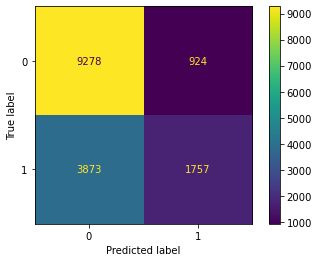

In [155]:
#plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_nn, X_test, y_test)

In [173]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# use the functions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(precision)
print(recall)

0.6553524804177546
0.31207815275310835


In [174]:
from sklearn.metrics import f1_score
#calculate F1 score
f1_score(y_test, y_pred)

0.4228131392130911

In [156]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(X_train,y_train);
y_hat = clf_tree.predict(X_test)
y_hat

array([1, 0, 0, ..., 0, 0, 0])

In [157]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
print(cm)
accuracy_score(y_test, y_hat)

[[7310 2892]
 [2776 2854]]


0.6419909044972208

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


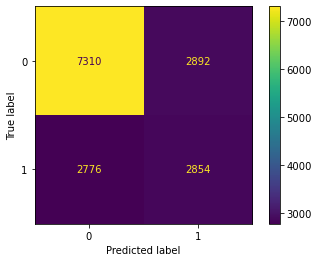

In [158]:
#plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_tree, X_test, y_test)

In [175]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# use the functions
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)

print(precision)
print(recall)

0.4966933518969718
0.5069271758436945


In [176]:
from sklearn.metrics import f1_score
#calculate F1 score
f1_score(y_test, y_hat)

0.5017580872011252

In [159]:
# SVM classifier
from sklearn.svm import SVC
clf_svm = SVC(kernel='poly', degree=3)
clf_svm.fit(X_train,y_train);

y_prd = clf_svm.predict(X_test)
y_prd

array([1, 1, 0, ..., 0, 1, 0])

In [160]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prd)
print(cm)
accuracy_score(y_test, y_prd)

[[9487  715]
 [4077 1553]]


0.697321879737241

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


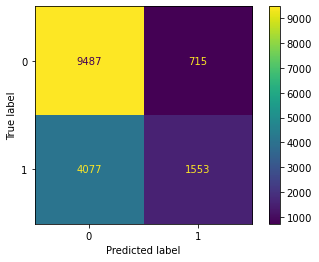

In [161]:
#plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_test, y_test)

In [177]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# use the functions
precision = precision_score(y_test, y_prd)
recall = recall_score(y_test, y_prd)

print(precision)
print(recall)

0.6847442680776014
0.2758436944937833


In [178]:
from sklearn.metrics import f1_score
#calculate F1 score
f1_score(y_test, y_prd)

0.39326411749810075

In [179]:
from sklearn.tree import DecisionTreeClassifier
#in the case of decision trees, we have to options for selecting our splitting criterion method
#the first is entropy and the second is Gini impurity.
# we could just use the default of entropy, but what if gini was better?
criterion_parameter = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

#import our KFold cross validation object.
from sklearn.model_selection import KFold

#we want one split for each parameter option
kf = KFold(n_splits=(len(criterion_parameter)))

accuracies = []
for index, (train_index, test_index) in enumerate(kf.split(X_train)):
    #build classifier with our current parameter.
    clf_knn_cv = KNeighborsClassifier(n_neighbors=criterion_parameter[index])
    #extract the cross vadlidated data into train and test datasets
    X_train_cv, y_train_cv = X_train[train_index], y_train[train_index]
    X_test_cv, y_test_cv = X_train[test_index], y_train[test_index]
    
    #fit our parameterised model to the cross-validated data.
    clf_knn_cv.fit(X_train_cv, y_train_cv)

    #obtain predictions on the cv test set.
    y_hat_cv = clf_knn_cv.predict(X_test_cv)

    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))
    print('Criterion:',criterion_parameter[index], '\ Accuracy:',accuracies[index])

#print(accuracies)
import numpy as np
# pick the best parameter
best_paramater = criterion_parameter[np.argmax(accuracies)]
print('Best parameter is:',best_paramater)

# train the classifier using the best parameter and the whole train set.
tuned_clf = KNeighborsClassifier(n_neighbors=best_paramater)
tuned_clf.fit(X_train, y_train)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(y_test, tuned_clf.predict(X_test))
print('Accuracy on unseen test data:',score)


Criterion: 2 \ Accuracy: 0.666445623342175
Criterion: 3 \ Accuracy: 0.6621352785145889
Criterion: 4 \ Accuracy: 0.6677718832891246
Criterion: 5 \ Accuracy: 0.6734084880636605
Criterion: 6 \ Accuracy: 0.6767241379310345
Criterion: 7 \ Accuracy: 0.6793766578249337
Criterion: 8 \ Accuracy: 0.6939655172413793
Criterion: 9 \ Accuracy: 0.6909814323607427
Criterion: 10 \ Accuracy: 0.6896551724137931
Criterion: 11 \ Accuracy: 0.7009283819628647
Criterion: 12 \ Accuracy: 0.6816976127320955
Criterion: 13 \ Accuracy: 0.7039124668435013
Criterion: 14 \ Accuracy: 0.693200663349917
Criterion: 15 \ Accuracy: 0.6928689883913765
Criterion: 16 \ Accuracy: 0.6822553897180763
Criterion: 17 \ Accuracy: 0.6918739635157546
Criterion: 18 \ Accuracy: 0.6892205638474295
Criterion: 19 \ Accuracy: 0.7048092868988391
Criterion: 20 \ Accuracy: 0.6928689883913765
Criterion: 21 \ Accuracy: 0.6975124378109453
Criterion: 22 \ Accuracy: 0.7048092868988391
Best parameter is: 19
Accuracy on unseen test data: 0.69555330975

In [162]:
#bundle up the classifiers
clfs = [clf_nn, clf_svm, clf_tree]

#fit the classifiers with the data
for clf in clfs:
    clf.fit(X_train, y_train)

#get the predictions for each classifier
clf_preds = [clf.predict(X_test) for clf in clfs]

#get the accuracy score for each classifer
accs = [accuracy_score(y_test, clf_p) for clf_p in clf_preds]

#get the index of the best accuracy
index = np.argmax(accs)

print("best classifier is:", clfs[index], " with an accuracy of: ", accs[index])
np.sort(accs)


best classifier is: SVC(kernel='poly')  with an accuracy of:  0.697321879737241


array([0.64142244, 0.69700606, 0.69732188])

Clustering:

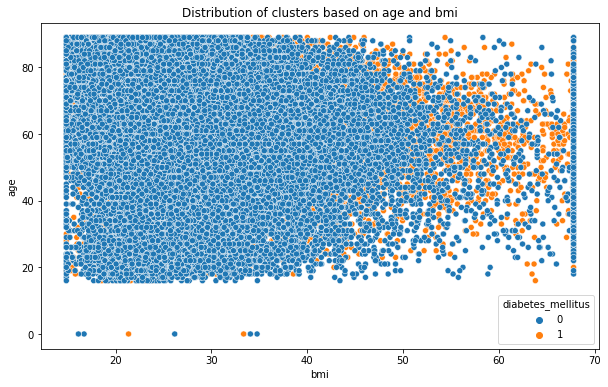

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=diabetes, x='bmi', y='age', hue='diabetes_mellitus')
plt.title('Distribution of clusters based on age and bmi')
plt.show()

In [33]:
path = "/Users/basavaraja/Desktop/Code/data_clustering.csv"
dataset = pd.read_csv(path)

In [34]:
# Count of NaN
dataset.isnull().sum()

encounter_id        0
gender             30
age              2842
bmi              2691
glucose         43772
dtype: int64

In [35]:
dataset["bmi"].fillna(dataset["bmi"].mean(), inplace = True)
dataset["glucose"].fillna(dataset["glucose"].mean(), inplace = True)
dataset["age"].fillna(dataset["age"].mean(), inplace = True)

In [36]:
# Count of NaN
dataset.isnull().sum()

encounter_id     0
gender          30
age              0
bmi              0
glucose          0
dtype: int64

In [37]:
Z = dataset.iloc[:, [3, 4]].values

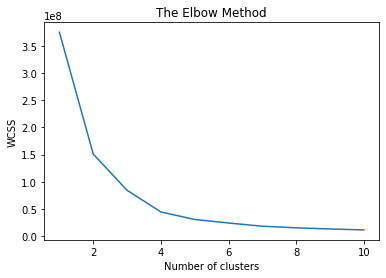

In [38]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
#Training the K-Means model on the dataset

km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = km.fit_predict(Z)
print(y_pred)

[0 0 0 ... 4 0 0]


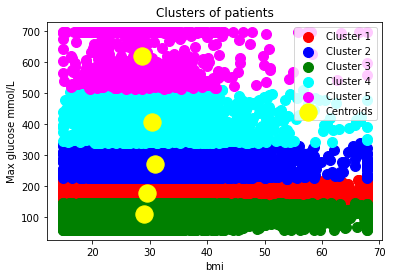

In [49]:
#Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.xlabel('bmi')
plt.ylabel('Max glucose mmol/L')
plt.legend()
plt.show()
